# Developing Mobile App for Lottery Addiction

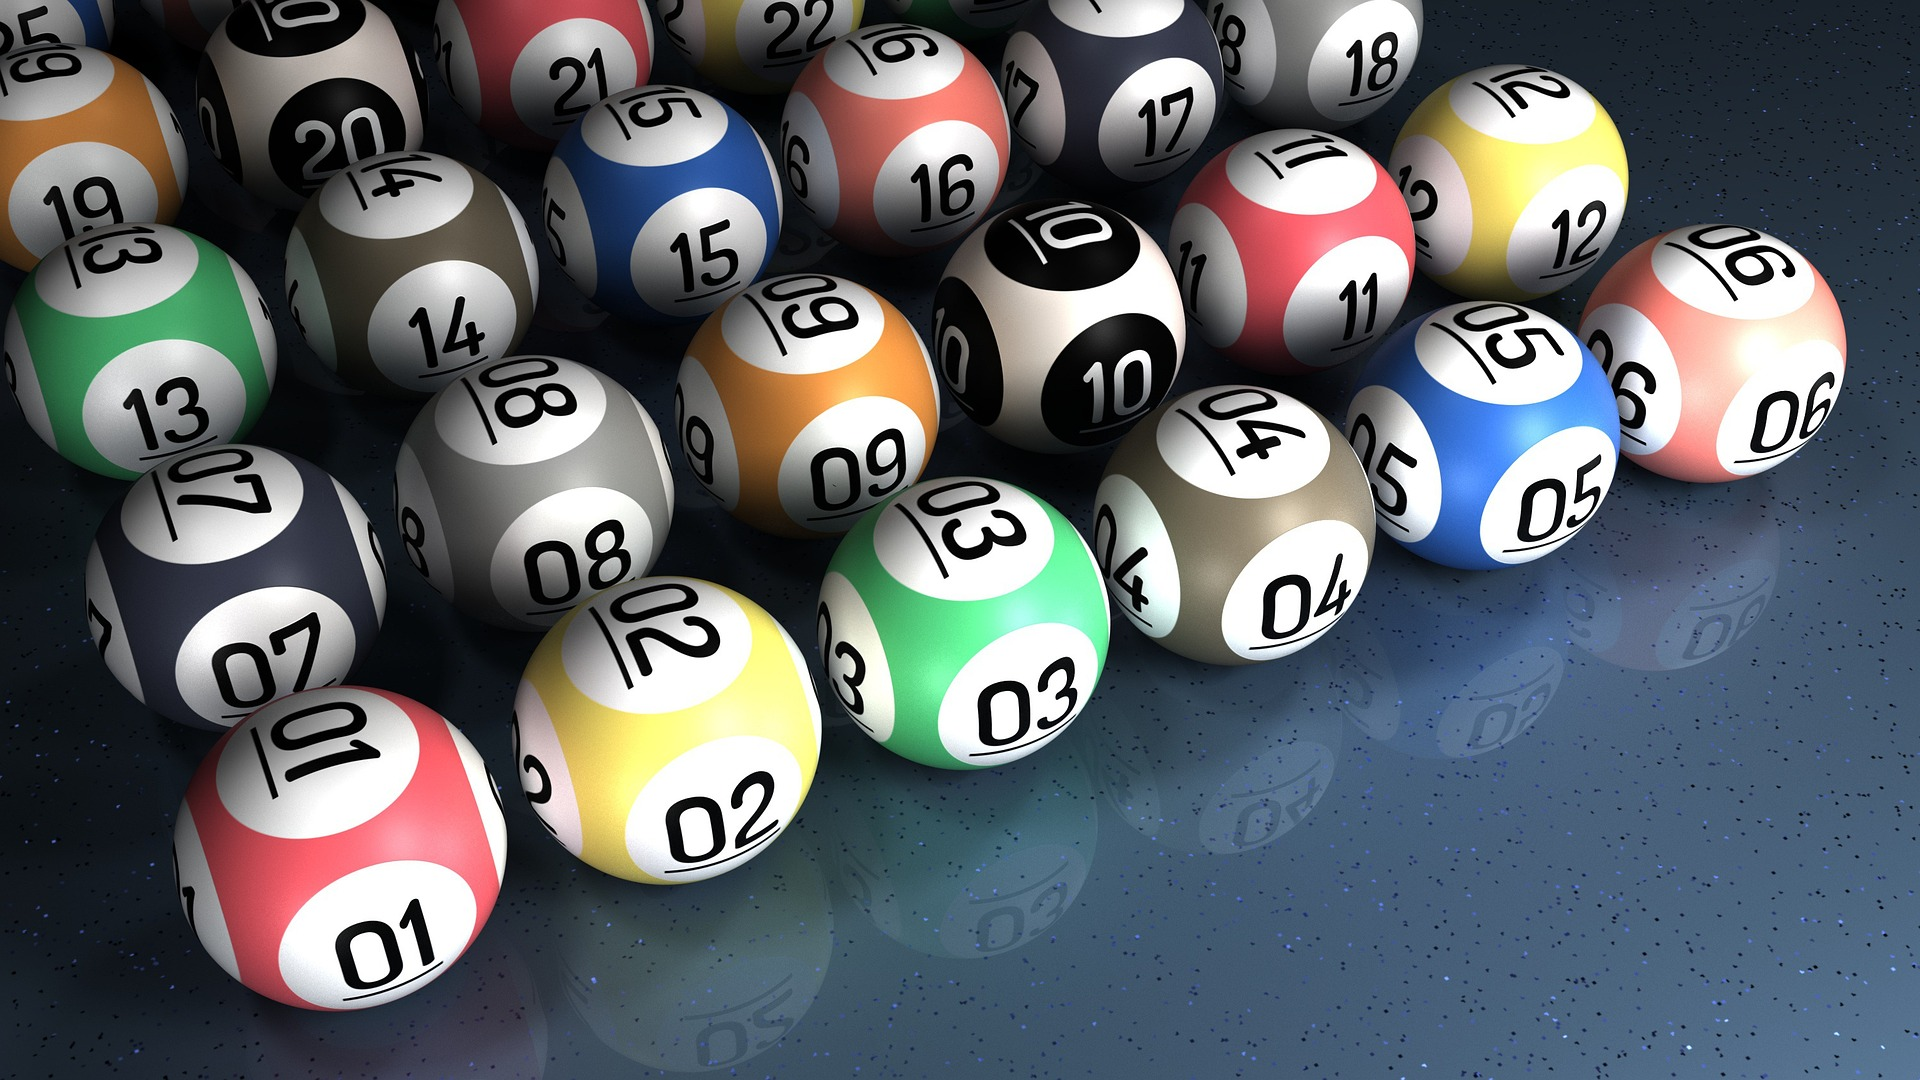

## Introduction

Many people start playing the lottery for fun, but for some this activity turns into a habit which eventually escalates into addiction. Like other compulsive gamblers, lottery addicts soon begin spending from their savings and loans, they start to accumulate debts, and eventually engage in desperate behaviours like theft.

A medical institute that aims to prevent and treat gambling addictions wants to build a dedicated mobile app to help lottery addicts better estimate their chances of winning. The institute has a team of engineers that will build the app, but they need us to create the logical core of the app and calculate probabilities.

For the first version of the app, they want us to focus on the __[6/49](https://en.wikipedia.org/wiki/Lotto_6/49)__ lottery and build functions that enable users to answer questions like:
-  What is the probability of winning the big prize with a single ticket?
-  What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
-  What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

The institute also wants us to consider historical data coming from the national 6/49 lottery game in Canada. __[The data](http://www.kaggle.com/datasets/datascienceai/lottery-dataset)__ set has data for 3,665 drawings, dating from 1982 to 2018.

The scenario we're following throughout this project is fictional — the main purpose is to practice applying the concepts we learned in a setting that simulates a real-world scenario.


## Creating functions

Throughout the project, we'll need to calculate repeatedly probabilities and combinations. As a consequence, we'll start by writing two functions that we'll use often:

-  A function that calculates factorials; and
-  A function that calculates combinations.

To calculate factorials, this is the formula we learned we need to use:
> n!= n × (n − 1) × (n − 2) × ... × 2 × 1

In the 6/49 lottery, six numbers are drawn from a set of 49 numbers that range from 1 to 49. The drawing is done without replacement, which means once a number is drawn, it's not put back in the set.

To find the number of combinations when we're sampling without replacement and taking only k objects from a group of n objects, we can use the formula:
> nCk = (n/k) = n!/k1(n - k)!


### One ticket probability function

In [1]:
# Writing the function for calculating factorial
def factorial(n):
    final_number = 1
    for i in range (n, 0, -1): #-1 is the step
        final_number *=i
    return final_number

# Function for calculating the number of combinations
def combinations(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

For the first version of the app, we want players to be able to calculate the probability of winning the big prize with the various numbers they play on a single ticket (for each ticket a player chooses six numbers out of 49). So, we'll start by building a function that calculates the probability of winning the big prize for any given ticket.

In [2]:
def one_ticket_probability(list):
    
    total_no_outcomes = combinations(49, 6)
    probability = 1/total_no_outcomes *100
    
    print("The chance of wining the big prize with the numbers {} is {:.7f}%. \
In other words it is 1 out of {:,} chances to win."\
          .format(list, probability, int(total_no_outcomes)))

In [3]:
# Testing our function
lottery_ticket = [1,2,3,4,5,6]
one_ticket_probability(lottery_ticket)

The chance of wining the big prize with the numbers [1, 2, 3, 4, 5, 6] is 0.0000072%. In other words it is 1 out of 13,983,816 chances to win.


As we can see the chance of winning a lottery with a single ticket is extremely low.

### Function for checking historical occurence 

In addition, for the first version of the app, users should also be able to compare their ticket against the historical lottery data and determine whether they would have ever won by now. We will focus on exploring the historical data coming from the Canada 6/49 lottery. The data set can be downloaded from __[Kaggle](https://www.kaggle.com/datasets/datascienceai/lottery-dataset)__. The data set contains historical data for 3,665 drawings (each row shows data for a single drawing), dating from 1982 to 2018. 

In [4]:
import pandas as pd
data = pd.read_csv('649.csv')
print(data.shape) # Exploring number of rows and columns
data.head(3) # Exploring the top three rows

(3665, 11)


,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34


In [5]:
data.tail(3) # Exploring the last three rows

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3662,649,3589,0,6/13/2018,6,22,24,31,32,34,16
3663,649,3590,0,6/16/2018,2,15,21,31,38,49,8
3664,649,3591,0,6/20/2018,14,24,31,35,37,48,17


Now we will attempt to extract all the winning six numbers from the historical data set as Python sets. 

In [6]:
# This is a function that takes as input a row of the lottery dataframe 
# and returns a set containing all the six winning numbers.

empty_list = []
def extract_numbers(list):
    numbers = set()
    for x in range(4,10):
        numbers.add(list[x])
    empty_list.append(numbers)
    return empty_list

In [7]:
# Using extract_numbers() in combination with the DataFrame.apply() function 
# to extract all the winning numbers from the data set.

data.apply(extract_numbers, axis =1)
display(empty_list[:5])

[{3, 11, 12, 14, 41, 43},
 {8, 33, 36, 37, 39, 41},
 {1, 6, 23, 24, 27, 39},
 {3, 9, 10, 13, 20, 43},
 {5, 14, 21, 31, 34, 47}]

In [8]:
# We will try another, more simple option to write the same function as above 

def extract_values(row):
    return set(row[4:10])
winning_numbers = data.apply(extract_values, axis =1) # Using DataFrame.apply() method again
winning_numbers.head()

0    {3, 41, 11, 12, 43, 14}
1    {33, 36, 37, 39, 8, 41}
2     {1, 6, 39, 23, 24, 27}
3     {3, 9, 10, 43, 13, 20}
4    {34, 5, 14, 47, 21, 31}
dtype: object

We will write another function that takes in two inputs: 
-  a Python list containing the user numbers 
-  a pandas Series containing sets with the winning numbers 


In [9]:
def check_historical_occurence(user_numbers, winning_numbers):
    user_numbers_set = set(user_numbers) # Converting the user numbers list as a set 
    matching_no = winning_numbers == user_numbers # Comparing the set against the pd.Series using Boolean values
    no_occurrences = matching_no.sum() # Calculating the number of matching True values
    
    if no_occurrences == 0:
        print('There has been no occurrences of your set numbers. \
You have a chance of winning with this set, however it is extremely small, \
in fact 1 out 13,983,816 or 0.0000072%.')
    else:
        print('The number of times the combination {} has occured is {}. \
You have a chance of winning with this set of numbers again, \
however it is extremely small, in fact 1 out 13,983,816 or 0.0000072%.'\
              .format(user_numbers, no_occurrences))

In [10]:
# Testing our new function

check_historical_occurence({23, 13, 2, 11, 18, 26}, winning_numbers)

There has been no occurrences of your set numbers. You have a chance of winning with this set, however it is extremely small, in fact 1 out 13,983,816 or 0.0000072%.


### Multi-ticket probability function

Lottery addicts usually play more than one ticket on a single drawing, thinking that this might increase their chances of winning significantly. Our purpose is to help them better estimate their chances of winning.
We will write  a function allowing users to calculate the chances of winning for any number of different tickets (without inputting the specific combinations they intend to play)


In [11]:
def multi_ticket_probability(number_user_tickets):
    total_no_outcomes = combinations(49, 6)
    user_outcome_percentage = number_user_tickets / total_no_outcomes * 100 
    probability = round(total_no_outcomes/number_user_tickets) 
    
    if number_user_tickets == 1: # Option for singular ticket outcome 
        print("The prbability of winning with {}  ticket is {:.7f}%. \
In other words there is 1 out of {:,} chances to win."\
          .format(number_user_tickets, user_outcome_percentage, probability))
    else: # Option for plural outcome 
        print("The prbability of winning with {:,} tickets is {:.7f}%. \
In other words there is 1 out of {:,} chances to win."\
          .format(number_user_tickets, user_outcome_percentage, probability))

We will test the function with the list of numbers. For this we will create a for loop to apply every value in the list to our function.

In [12]:
test = [1, 10, 100, 10000, 1000000, 6991908, 13983816]
for i in test:
    multi_ticket_probability(i)
    print('--------') # Inserting delimiter for visually more pleasant output

The prbability of winning with 1  ticket is 0.0000072%. In other words there is 1 out of 13,983,816 chances to win.
--------
The prbability of winning with 10 tickets is 0.0000715%. In other words there is 1 out of 1,398,382 chances to win.
--------
The prbability of winning with 100 tickets is 0.0007151%. In other words there is 1 out of 139,838 chances to win.
--------
The prbability of winning with 10,000 tickets is 0.0715112%. In other words there is 1 out of 1,398 chances to win.
--------
The prbability of winning with 1,000,000 tickets is 7.1511238%. In other words there is 1 out of 14 chances to win.
--------
The prbability of winning with 6,991,908 tickets is 50.0000000%. In other words there is 1 out of 2 chances to win.
--------
The prbability of winning with 13,983,816 tickets is 100.0000000%. In other words there is 1 out of 1 chances to win.
--------


### Function for calculating the probability of less than 6 winning numbers

For extra context, in most 6/49 lotteries there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. As a consequence, the users might be interested in knowing the probability of having two, three, four, or five winning numbers.

We will write the function which provides information about the probability of winning with the range between 2 and 5 winning numbers.

For the purposes of this exercise, we want to calculate the probability of having __exactly__ x amount of  winning numbers and NOT the probability of having __at least__ x amount of winning numbers. 

In [13]:
def probability_less_6(x):
    # Calculating the number of successful given the value of the input (x)
    n_combinations = combinations(6,x) # Total number of x-number combinations
    
    # Number of remaining combinations (6 less x)
    n_remaining_combinations = combinations(43, 6-x) 
    # 43 here comes from removing 6 winning numbers from the pool of 49 
    # 6-x is the number of combinations with 6-x incorrect numbers
    
    # Total number of successful outcomes
    n_successful_outcomes = n_combinations * n_remaining_combinations
    
    total_no_outcomes = combinations(49,6)
    
    probability = n_successful_outcomes/total_no_outcomes
    percentage_probability = probability * 100
    
    # Probaility "in reverse" in order to calculate the '1 out x amount' chances
    probability_round = round(total_no_outcomes/n_successful_outcomes) 
    
    print('The probability for {} winning numbers is {:.4f}%. \
In other words you chances of winning are 1 out of {:,}'\
          .format(x, percentage_probability, probability_round))

In [14]:
# Testing our new function with all possible winning combinations (except 6)
test = [2, 3, 4, 5]
for i in test:
    probability_less_6(i)
    print('--------') # Inserting delimiter for visually more pleasant output

The probability for 2 winning numbers is 13.2378%. In other words you chances of winning are 1 out of 8
--------
The probability for 3 winning numbers is 1.7650%. In other words you chances of winning are 1 out of 57
--------
The probability for 4 winning numbers is 0.0969%. In other words you chances of winning are 1 out of 1,032
--------
The probability for 5 winning numbers is 0.0018%. In other words you chances of winning are 1 out of 54,201
--------


### Conclusion

In this project we have answered to the questions raised and managed to create several important functions for our app, such as:
-  *one_ticket_probability()*  — calculates the probability of winning the big prize with a single ticket
-  *check_historical_occurrence()* — checks whether a certain combination has occurred in the historical data set
-  *multi_ticket_probability()* — calculates the probability for any number of tickets between 1 and 13,983,816
-  *probability_less_6()* — calculates the probability of having two, three, four or five winning numbers

There is a scope for further analysis on this topic. For instance, we can create a function similar to *probability_less_6()* which calculates the probability of having __at least__ two, three, four or five winning numbers. 

Another option is to combine the *one_ticket_probability()* and *check_historical_occurrence()* to output information on probability and historical occurrence at the same time.

Finally, we can compare the probability of winning the lottery to various rare events which may happen in life. 
